In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [21]:
df = pd.read_csv('./src/data/original_csv.csv')
#check data head
print(df.head())


   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion   Single Epithelial Cell Size Bare Nuclei  \
0                  1                             2           1   
1                  5                             7          10   
2                  1                             2           2   
3                  1                             3           4   
4                  3                             2           1   

   Bland Chromatin  Normal Nucleoli  Mitoses   class  
0                3                1        1  class1  
1                3                2        1  class1  

***Check data info***

In [38]:
#check data information
#print(df.info())
#chcek empty data
print(df.isnull().sum())
print(df.isna().sum())
#check data shape
print(df.shape)

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
 Single Epithelial Cell Size    0
Bare Nuclei                     0
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
class                           0
dtype: int64
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
 Single Epithelial Cell Size    0
Bare Nuclei                     0
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
class                           0
dtype: int64
(699, 10)


***Seems no null values in the dataset***

#Check types of classes

In [24]:
print("Number of classes:", df['class'].value_counts())

Number of classes: class1    458
class2    241
Name: class, dtype: int64


# Encoding categorical data values

In [34]:
from sklearn.preprocessing import LabelEncoder
le_Y = LabelEncoder()
df['class'] = le_Y.fit_transform(df['class'])
print(df['class']) 

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64


In [68]:
# now check our data
print(df.head())
df.to_csv('./src/data/train.csv', index=False)

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion   Single Epithelial Cell Size Bare Nuclei  \
0                  1                             2           1   
1                  5                             7          10   
2                  1                             2           2   
3                  1                             3           4   
4                  3                             2           1   

   Bland Chromatin  Normal Nucleoli  Mitoses  class  
0                3                1        1      0  
1                3                2        1      0  
2 

***classes are changed to int. class1 = 0, class2 = 1***

## Check statistical info

In [39]:
print(df.describe())

       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count       699.000000               699.000000                699.000000   
mean          4.417740                 3.134478                  3.207439   
std           2.815741                 3.051459                  2.971913   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal Adhesion   Single Epithelial Cell Size  Bland Chromatin  \
count         699.000000                    699.000000       699.000000   
mean            2.806867                      3.216023         3.437768   
std             2.855379                      2.214300         2.438364   
min   

- count - The number of not-empty values.

- mean - The average (mean) value.

- std - The standard deviation.

- min - the minimum value.

- 25% - The 25% percentile*.

- 50% - The 50% percentile*.

- 75% - The 75% percentile*.

- max - the maximum value.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Clump Thickness               699 non-null    int64 
 1   Uniformity of Cell Size       699 non-null    int64 
 2   Uniformity of Cell Shape      699 non-null    int64 
 3   Marginal Adhesion             699 non-null    int64 
 4    Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                   699 non-null    object
 6   Bland Chromatin               699 non-null    int64 
 7   Normal Nucleoli               699 non-null    int64 
 8   Mitoses                       699 non-null    int64 
 9   class                         699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Let's check class distribution

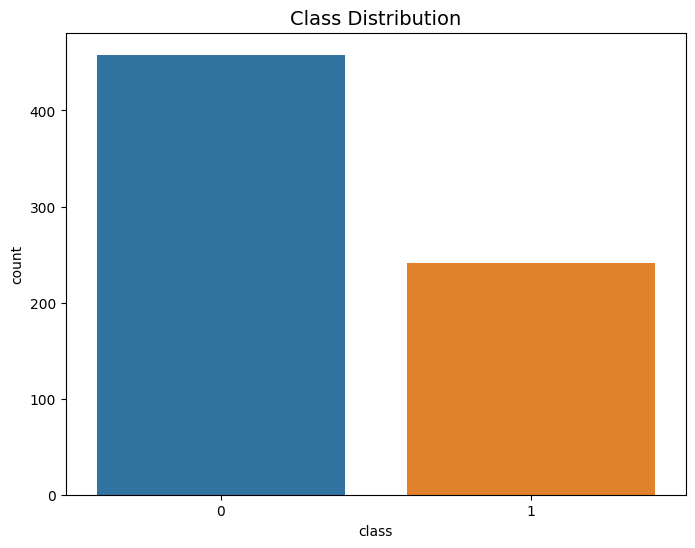

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution', fontsize=14)
plt.show()

***Imbalanced data***

# Let's make pair plot

<Figure size 1200x1200 with 0 Axes>

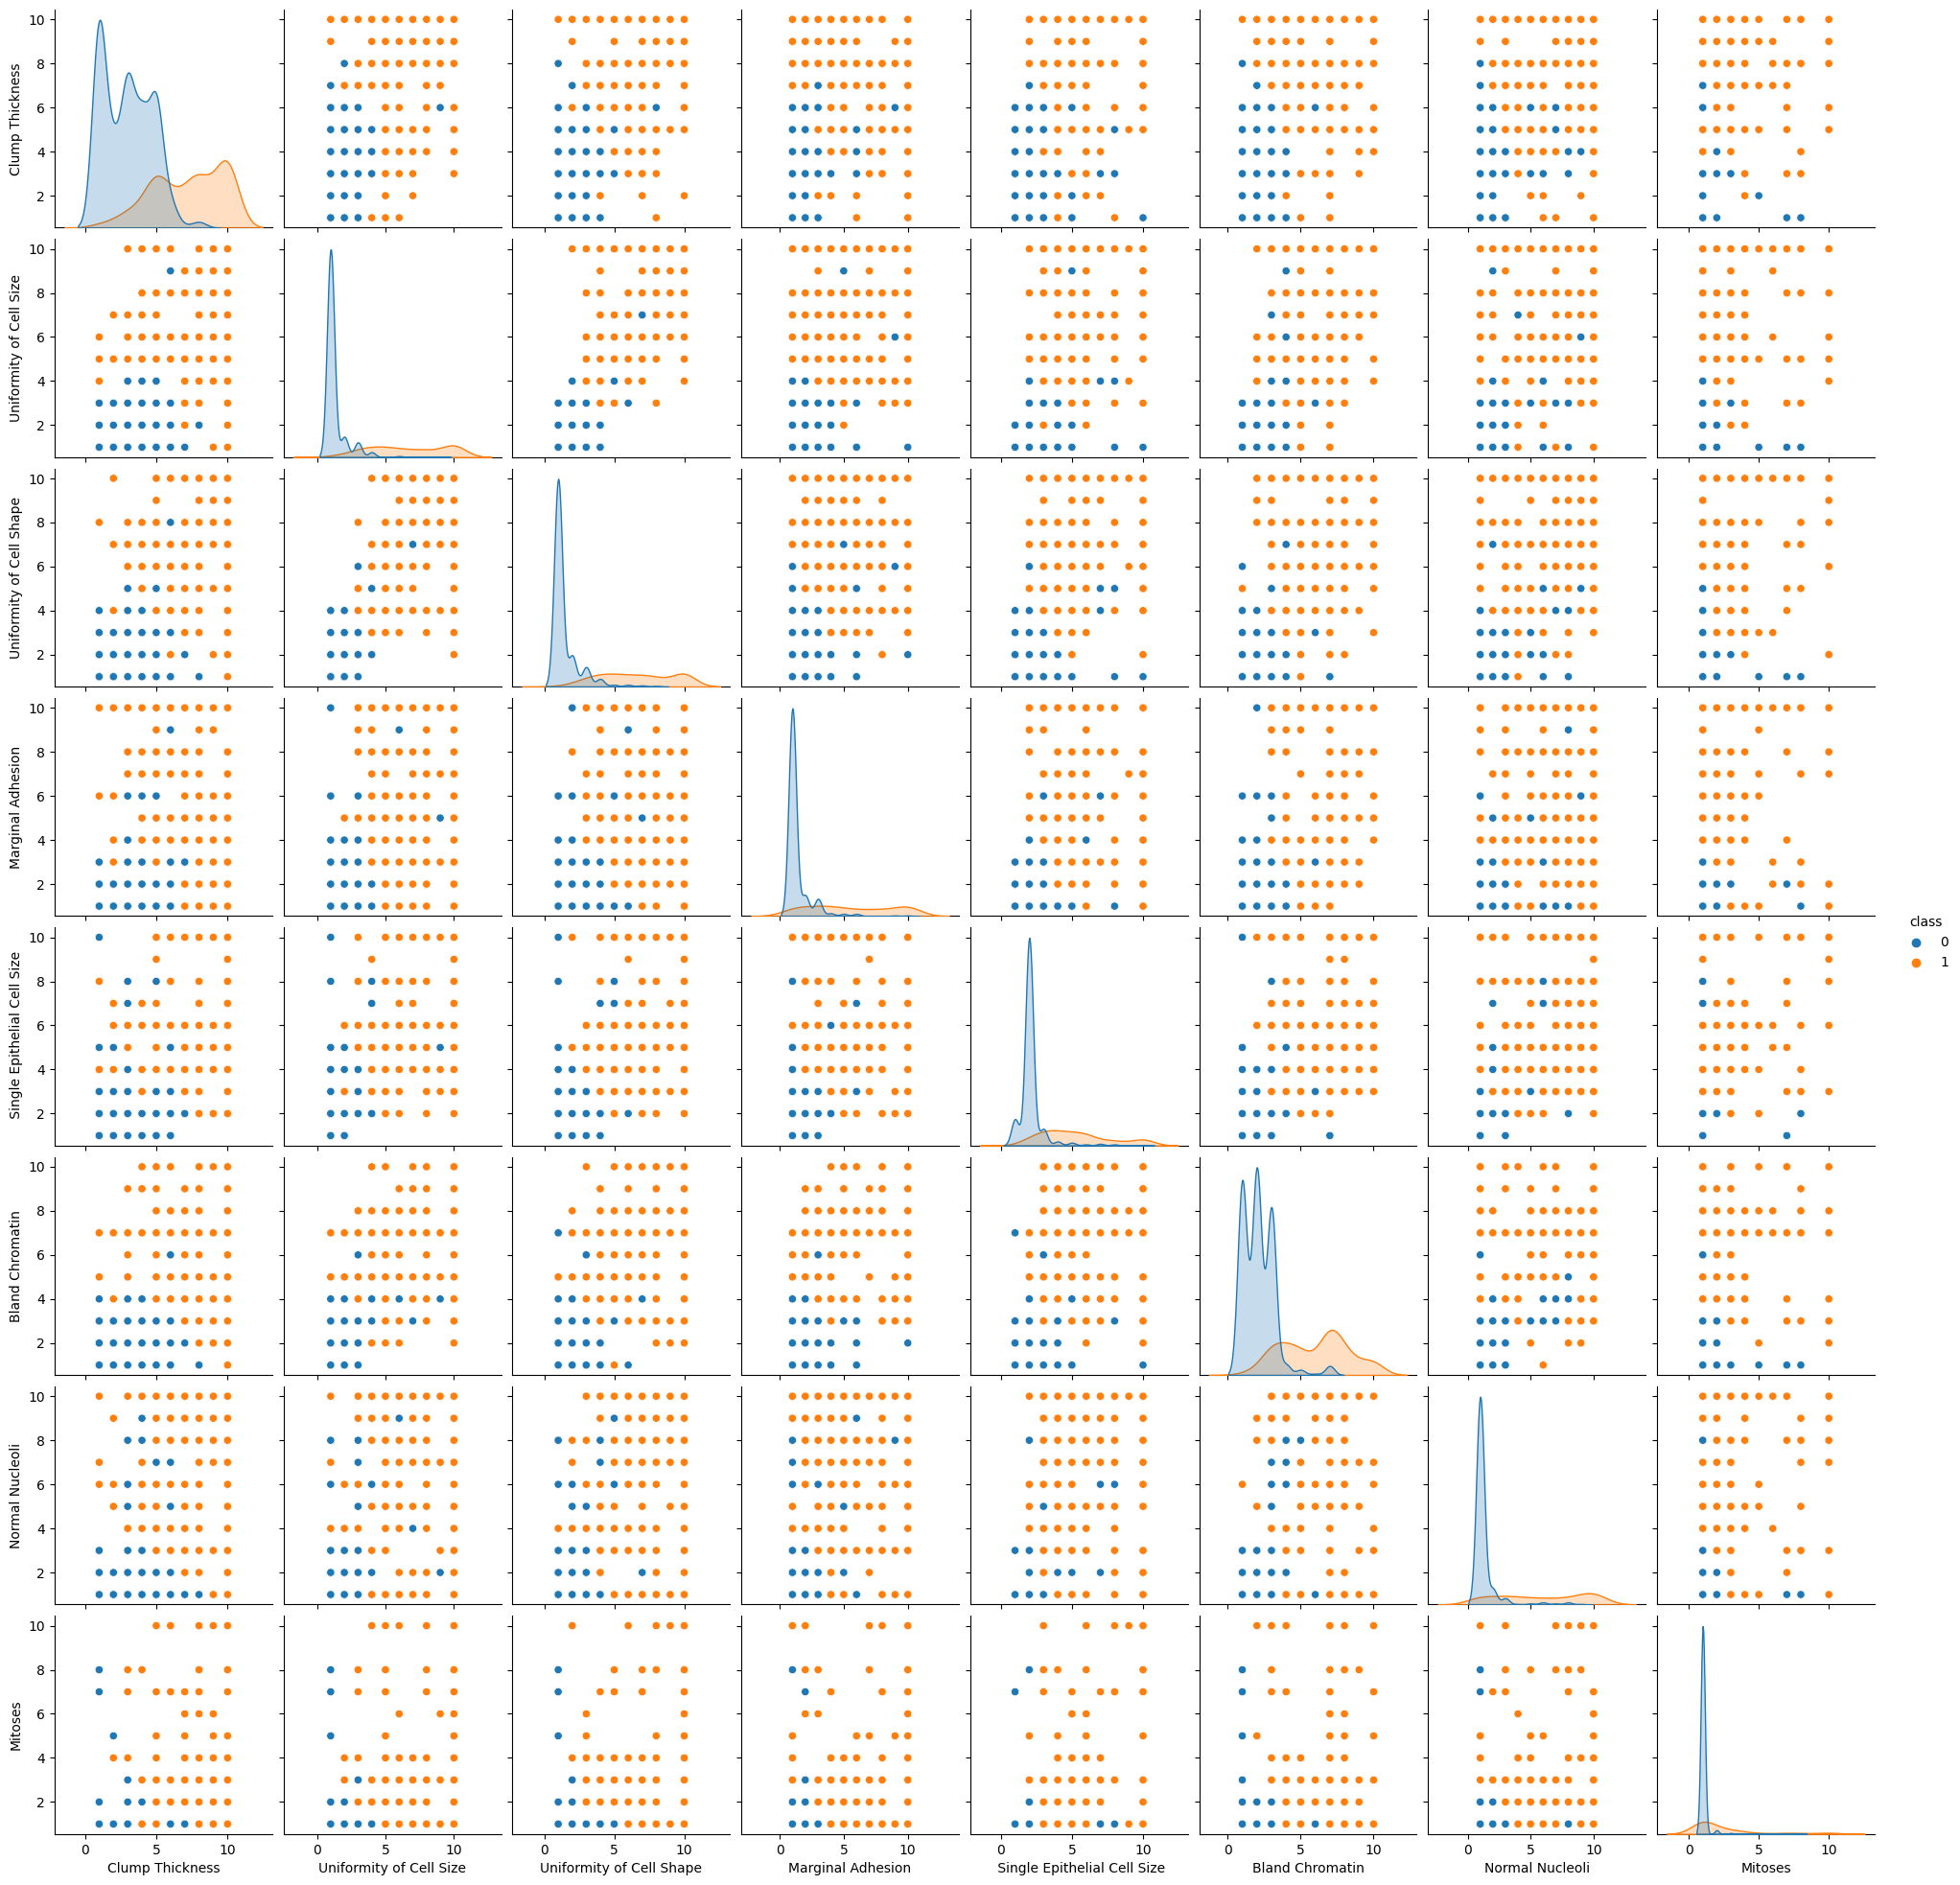

In [37]:
plt.figure(figsize=(12, 12))
sns.pairplot(df, hue='class')
plt.show()

*** Seems class 1 is more scattered.***

## Let's see what else we can see

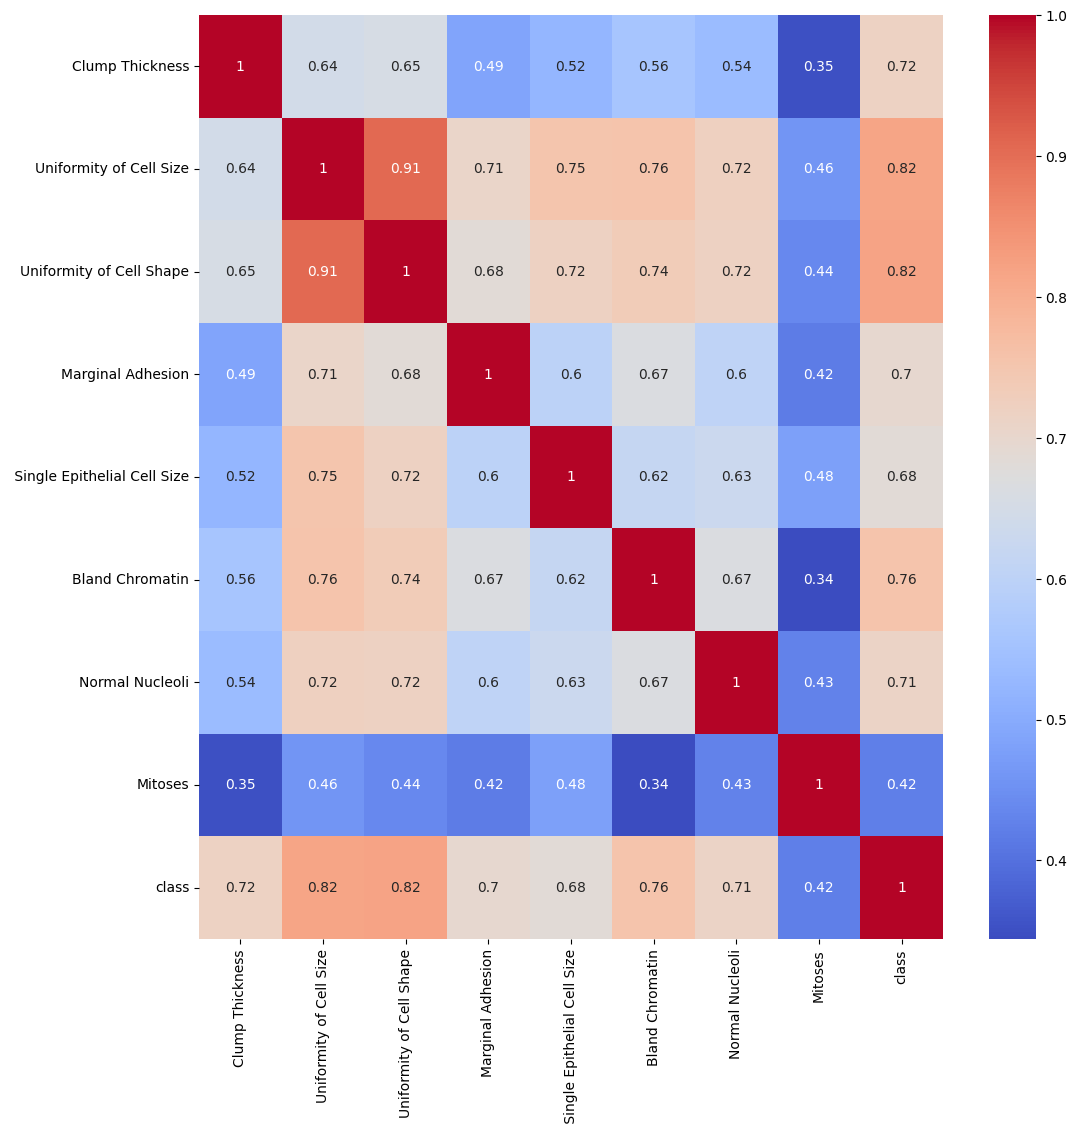

In [40]:
#check correlation
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

***Seems 'uniformity of cell size' and 'uniformity of cell shape' are highly correlated to other features.***

***Other features also have more than 40% correlation.***

## Plot 'uniformity of cell size' and 'uniformity of cell shape'

In [50]:
print(df.columns)

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       ' Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'class'],
      dtype='object')


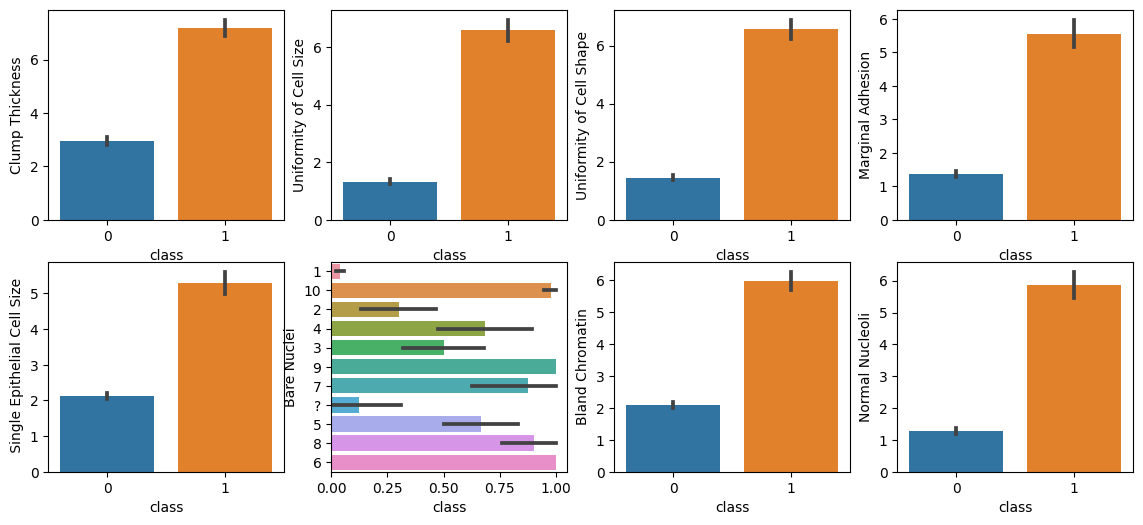

In [53]:
#make hist plot 
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))
sns.barplot(x='class', y='Clump Thickness', data=df, ax=axes[0, 0])
sns.barplot(x='class', y='Uniformity of Cell Size', data=df, ax=axes[0, 1])
sns.barplot(x='class', y='Uniformity of Cell Shape', data=df, ax=axes[0, 2])
sns.barplot(x='class', y='Marginal Adhesion', data=df, ax=axes[0, 3])
sns.barplot(x='class', y=' Single Epithelial Cell Size', data=df, ax=axes[1, 0])
sns.barplot(x='class', y='Bare Nuclei', data=df, ax=axes[1, 1])
sns.barplot(x='class', y='Bland Chromatin', data=df, ax=axes[1, 2])
sns.barplot(x='class', y='Normal Nucleoli', data=df, ax=axes[1, 3])
plt.show()




# Make violin plot

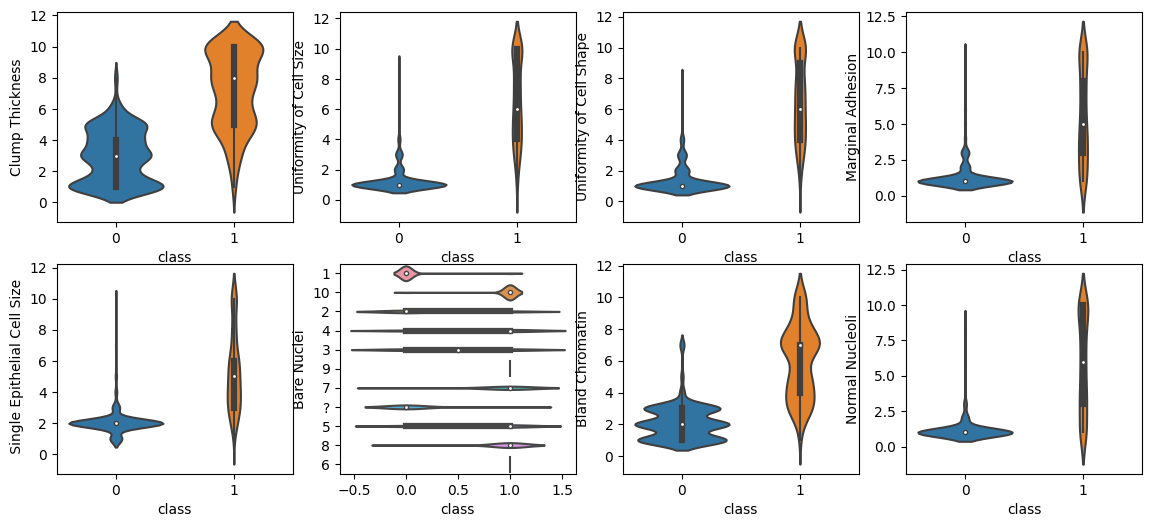

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))
sns.violinplot(x='class', y='Clump Thickness', data=df, ax=axes[0, 0])
sns.violinplot(x='class', y='Uniformity of Cell Size', data=df, ax=axes[0, 1])
sns.violinplot(x='class', y='Uniformity of Cell Shape', data=df, ax=axes[0, 2])
sns.violinplot(x='class', y='Marginal Adhesion', data=df, ax=axes[0, 3])
sns.violinplot(x='class', y=' Single Epithelial Cell Size', data=df, ax=axes[1, 0])
sns.violinplot(x='class', y='Bare Nuclei', data=df, ax=axes[1, 1])
sns.violinplot(x='class', y='Bland Chromatin', data=df, ax=axes[1, 2])
sns.violinplot(x='class', y='Normal Nucleoli', data=df, ax=axes[1, 3])
plt.show()


***No outliers***

***Class 1 has higher probability density***

***Class 2 has higher interquartile range***

***Class  1 has 1.5x interquartile range than class 2***

# Let's make box plot to confirm outliers

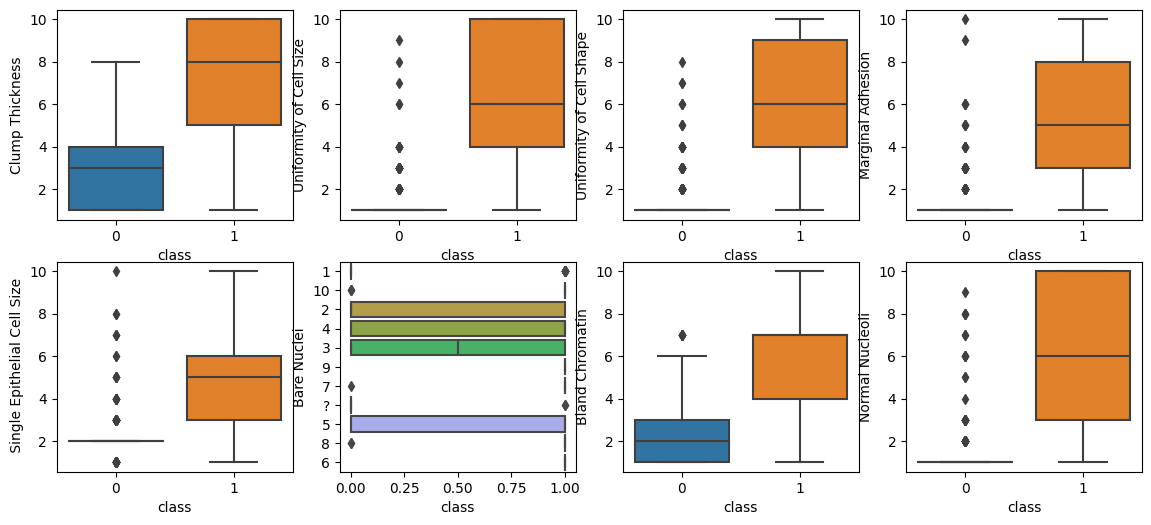

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))
sns.boxplot(x='class', y='Clump Thickness', data=df, ax=axes[0, 0])
sns.boxplot(x='class', y='Uniformity of Cell Size', data=df, ax=axes[0, 1])
sns.boxplot(x='class', y='Uniformity of Cell Shape', data=df, ax=axes[0, 2])
sns.boxplot(x='class', y='Marginal Adhesion', data=df, ax=axes[0, 3])
sns.boxplot(x='class', y=' Single Epithelial Cell Size', data=df, ax=axes[1, 0])
sns.boxplot(x='class', y='Bare Nuclei', data=df, ax=axes[1, 1])
sns.boxplot(x='class', y='Bland Chromatin', data=df, ax=axes[1, 2])
sns.boxplot(x='class', y='Normal Nucleoli', data=df, ax=axes[1, 3])
plt.show()

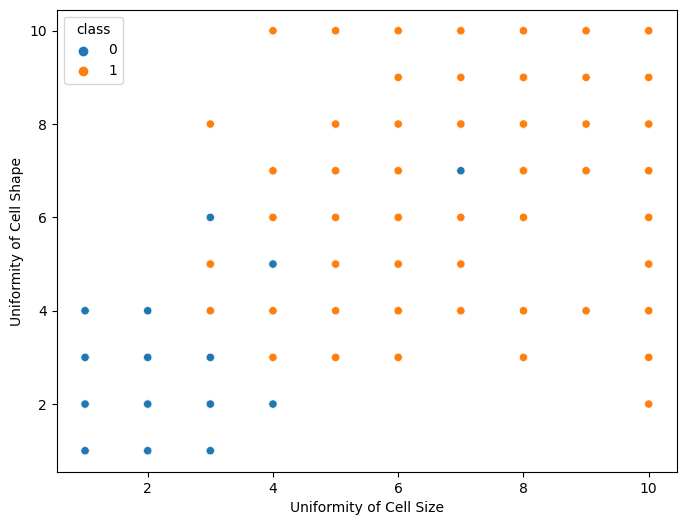

In [56]:
#Uniformity of Cell Size vs Uniformity of Cell Shape
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Uniformity of Cell Size', y='Uniformity of Cell Shape', data=df, hue='class')
plt.show()

/var/folders/0m/v0fjp1311kv7mndnw2c5k9_c0000gp/T/ipykernel_37097/972295800.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std().plot(kind='bar')


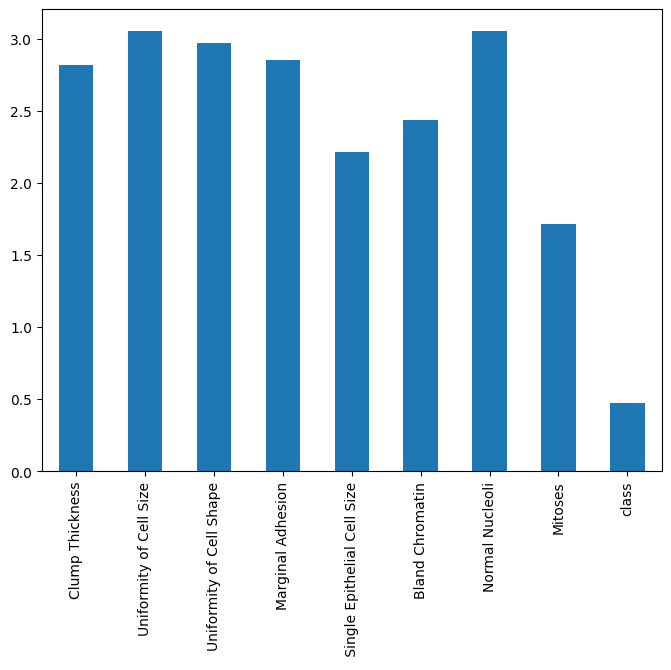

In [62]:
#plot std of each feature
plt.figure(figsize=(8, 6))
df.std().plot(kind='bar')
plt.show()

/var/folders/0m/v0fjp1311kv7mndnw2c5k9_c0000gp/T/ipykernel_37097/26308331.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean().plot(kind='bar')


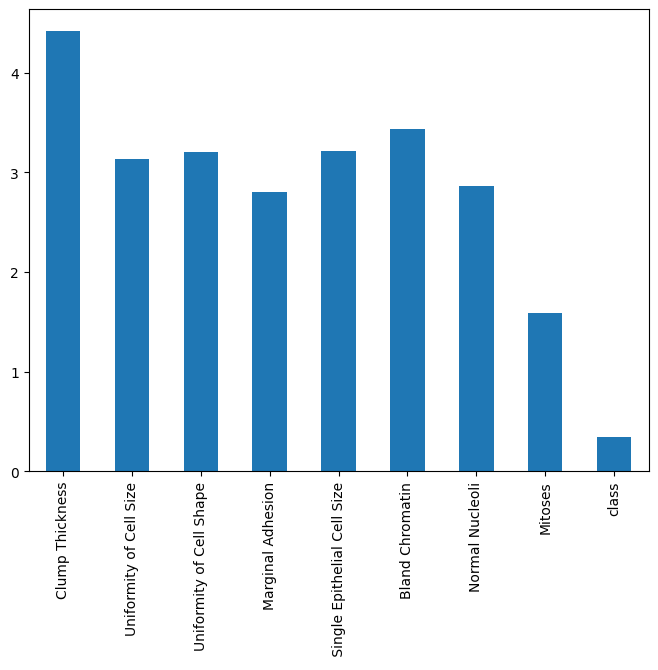

In [63]:
#plot mean of each feature
plt.figure(figsize=(8, 6))
df.mean().plot(kind='bar')
plt.show()

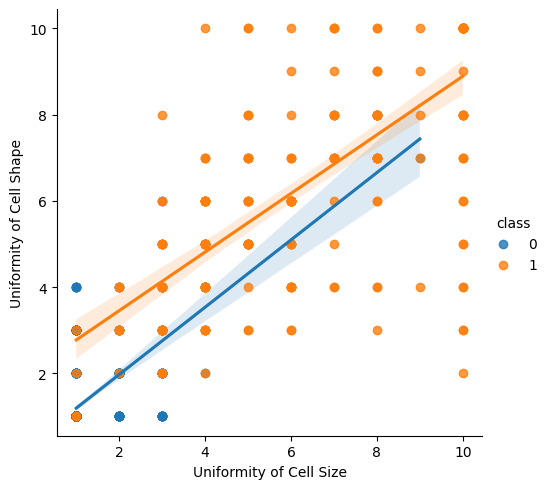

In [66]:
sns.lmplot(x = 'Uniformity of Cell Size', y = 'Uniformity of Cell Shape', hue = 'class', data = df)

In [69]:
df1 = pd.read_csv('./src/data/train.csv')
#check data type
print(df1.dtypes)

Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
 Single Epithelial Cell Size     int64
Bare Nuclei                     object
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
class                            int64
dtype: object
